**Resumen:** El siguiente código aplica el enviorment de compra/venta de acciones para un activo elegido sin una razón más que el provoca el estudio de una recomendación aplicada a un proceso X(t,w) aleatorio.

In [1]:
import pandas as pd

# 1. Objetivo:

Realizar una aplicación del enviorment asociado a **stock exchange** para **recomendar** compra/venta.

Primero se intenta con Google Finance

# 2. Data engineering

La idea es conectarse con un set de datos histórico, matemáticamente lo que buscamos es un proceso *X(t,w)*

In [14]:
pip install googlefinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for googlefinance: filename=googlefinance-0.7-py3-none-any.whl size=2586 sha256=82e13103c4d886774912dde4305114d035e5e7b49562146a89cf1dd34430649e
  Stored in directory: /root/.cache/pip/wheels/50/bd/64/b32b38aebd40e333f615ae9e28003e88d5629e377e4f4a8a00
Successfully built googlefinance


In [ ]:
from googlefinance import getQuotes
import json

In [ ]:
#json.dumps(getQuotes('NYSE'), indent=2)

Tuve problemas con linkearme a Google finance, y al probar con Yahoo finance tuve éxito.

In [15]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
import yfinance as yf

In [18]:
pfe = yf.Ticker('AMZN')
pfe.info

{'zip': '98109-5210',
 'sector': 'Consumer Cyclical',
 'fullTimeEmployees': 1523000,
 'longBusinessSummary': 'Amazon.com, Inc. engages in the retail sale of consumer products and subscriptions in North America and internationally. The company operates through three segments: North America, International, and Amazon Web Services (AWS). It sells merchandise and content purchased for resale from third-party sellers through physical and online stores. The company also manufactures and sells electronic devices, including Kindle, Fire tablets, Fire TVs, Rings, and Echo and other devices; provides Kindle Direct Publishing, an online service that allows independent authors and publishers to make their books available in the Kindle Store; and develops and produces media content. In addition, it offers programs that enable sellers to sell their products on its websites, as well as its stores; and programs that allow authors, musicians, filmmakers, Twitch streamers, skill and app developers, and 

In [ ]:
pfe.dividends

Series([], Name: Dividends, dtype: int64)

Descargando una serie histórica.

In [ ]:
#hist = pfe.history(period="max")
hist = pfe.history(period = 'ytd')
#hist['Date' >= '2021-01-01']

In [ ]:
hist.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends         int64
Stock Splits    float64
dtype: object

# 3. Feature engeneering

In [ ]:
import plotly.graph_objects as go

In [ ]:
fig = go.Figure(data=go.Scatter(x=hist.index,y=hist['Close'], mode='lines'))
#lines+markers option
fig.show()

In [ ]:

from plotly.subplots import make_subplots

fig3 = make_subplots(specs=[[{"secondary_y": True}]])
fig3.add_trace(go.Candlestick(x=hist.index,
                              open=hist['Open'],
                              high=hist['High'],
                              low=hist['Low'],
                              close=hist['Close'],
                             ))

In [ ]:
hist['diff'] = hist['Close'] - hist['Open']
hist.loc[hist['diff']>=0, 'color'] = 'green'
hist.loc[hist['diff']<0, 'color'] = 'red'

In [ ]:
fig3 = make_subplots(specs=[[{"secondary_y": True}]])
fig3.add_trace(go.Candlestick(x=hist.index,
                              open=hist['Open'],
                              high=hist['High'],
                              low=hist['Low'],
                              close=hist['Close'],
                              name='Price'))
fig3.add_trace(go.Scatter(x=hist.index,y=hist['Close'].rolling(window=20).mean(),marker_color='blue',name='20 Day MA'))
fig3.add_trace(go.Bar(x=hist.index, y=hist['Volume'], name='Volume', marker={'color':hist['color']}),secondary_y=True)
fig3.update_yaxes(range=[0,700000000],secondary_y=True)
fig3.update_yaxes(visible=False, secondary_y=True)
fig3.update_layout(xaxis_rangeslider_visible=False)  #hide range slider
fig3.update_layout(title={'text':'AMZN', 'x':0.5})
fig3.show()

In [ ]:
fig3.update_xaxes(rangebreaks = [
                       dict(bounds=['sat','mon']), # hide weekends
                       #dict(bounds=[16, 9.5], pattern='hour'), # for hourly chart, hide non-trading hours (24hr format)
                       dict(values=["2021-12-25","2022-01-01"]) #hide Xmas and New Year
                                ])

#4. Reinforcement learning

# 4.1 Enviorment stock-v0

In [2]:
import sys
print(sys.version)

3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]


Tuve problemas con la instalación de tensorflow así que use !pip

In [3]:
!pip install tensorflow-gpu==1.15.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import gym

In [5]:
pip install gym-anytrading

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import gym_anytrading

Luego tuve problemas con el llamado del baseline y luego con su instalación. Leí que debía actualizar el pip:

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement stable_baseline (from versions: non

ERROR: No matching distribution

In [52]:
!apt-get update && apt-get upgrade python-pip

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease [15.9 kB]
Get:12 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [90.7 kB]
Ge

In [7]:
#!pip install stable_baseline
!pip install stable-baselines3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Dejo el error que me salió y solucioné con "bajar el - a _"
https://stable-baselines3.readthedocs.io/en/master/_modules/stable_baselines3/common/vec_env/dummy_vec_env.html

In [8]:
# Stable baselines - rl stuff
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C

ModuleNotFoundError: ignored

In [10]:
from stable_baselines3.common.vec_env.base_vec_env import VecEnv, VecEnvIndices, VecEnvObs, VecEnvStepReturn
from stable_baselines3.common.vec_env.util import copy_obs_dict, dict_to_obs, obs_space_info

In [11]:
from stable_baselines3.common.vec_env import DummyVecEnv

In [26]:
from stable_baselines3 import A2C

In [12]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [33]:
#df = pfe.history(period="max")
df = pfe.history(period = 'ytd')
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-01-03,167.550003,170.703506,166.160507,170.404495,63520000,0,0.0
2022-01-04,170.438004,171.399994,166.349503,167.522003,70726000,0,0.0
2022-01-05,166.882996,167.126495,164.356995,164.356995,64302000,0,0.0
2022-01-06,163.450500,164.800003,161.936996,163.253998,51958000,0,0.0
2022-01-07,163.839005,165.243500,162.031006,162.554001,46606000,0,0.0


In [41]:
env = gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)

In [23]:
env.action_space

Discrete(2)

info {'total_reward': -36.3184814453125, 'total_profit': 0.51593088805525, 'position': 1}


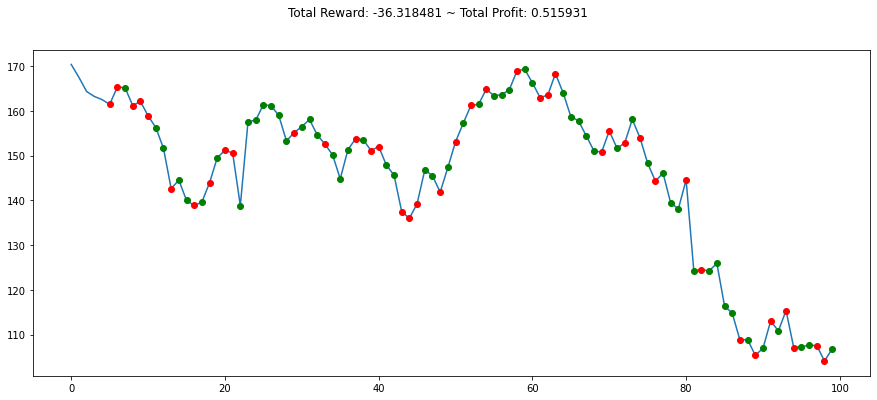

In [42]:
state = env.reset()
while True:
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done:
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [ ]:
env_maker = lambda: gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)
env = DummyVecEnv([env_maker])

In [27]:
policy_kwargs = dict(net_arch=[64, 'lstm', dict(vf=[128, 128, 128], pi=[64, 64])])
model = A2C('MlpLstmPolicy', env, verbose=1, policy_kwargs=policy_kwargs)
model.learn(total_timesteps=10000)

#https://stackoverflow.com/questions/tagged/openai-gym?tab=active&page=7

ValueError: ignored

#4.2 Enviorment forex-v0

In [36]:
#from gym_anytrading.datasets import FOREX_EURUSD_1H_ASK, STOCKS_GOOGL
#custom_env lo cambie por env
env = gym.make('forex-v0',
               df = df,
               window_size = 5,
               frame_bound = (5, 100),
               unit_side = 'right')

# custom_env = gym.make('stocks-v0',
#                df = STOCKS_GOOGL,
#                window_size = 10,
#                frame_bound = (10, 300))

info: {'total_reward': -138120.1934814453, 'total_profit': 0.7691630048996692, 'position': 1}


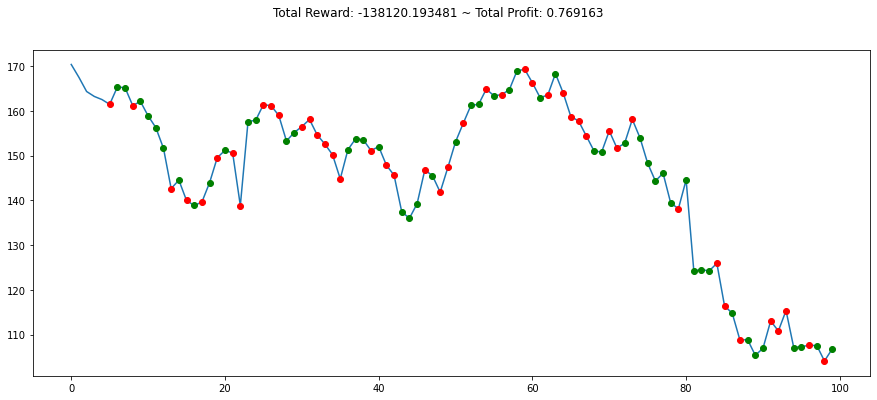

In [38]:
observation = env.reset()
while True:
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    # env.render()
    if done:
        print("info:", info)
        break

plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

A igual configuración del ambiente stock-v0 se comportan diferentes en las decisiones.

info {'total_reward': 510060.2722167969, 'total_profit': 0.9576832398802823, 'position': 0}


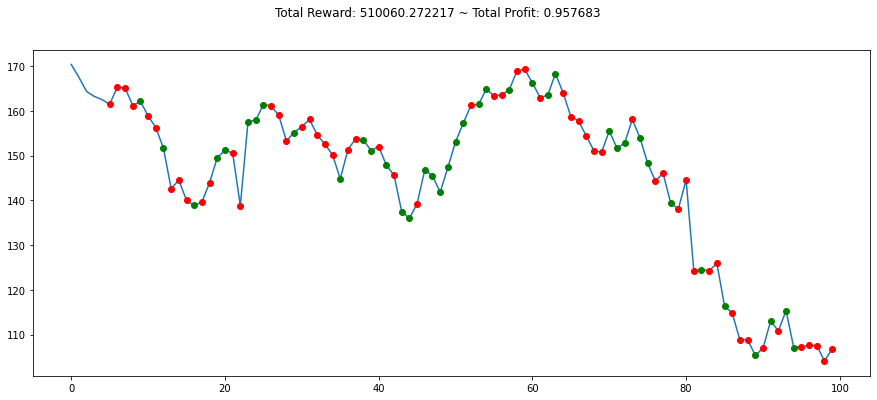

In [39]:
state = env.reset()
while True:
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done:
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

# 4.3 Otros entornos

In [56]:
#otros baselines módulos
#https://stable-baselines.readthedocs.io/en/master/guide/examples.html